In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger

import matplotlib.pyplot as plt

Using TensorFlow backend.


## Multi-layer perceptron

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [20]:
model = Sequential()
model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [30]:
es = EarlyStopping(monitor='val_loss', patience=2)
cvs_logger = CSVLogger('training.log')
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1,
                 callbacks=[es, cvs_logger])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 7s - loss: 0.0402 - acc: 0.9879 - val_loss: 0.0785 - val_acc: 0.9813
Epoch 2/20
54000/54000 [==============================] - 8s - loss: 0.0339 - acc: 0.9899 - val_loss: 0.0811 - val_acc: 0.9837
Epoch 3/20
54000/54000 [==============================] - 8s - loss: 0.0314 - acc: 0.9911 - val_loss: 0.0789 - val_acc: 0.9817
Epoch 4/20
54000/54000 [==============================] - 8s - loss: 0.0286 - acc: 0.9920 - val_loss: 0.0939 - val_acc: 0.9822


In [31]:
%cat training.log

In [40]:
score = model.evaluate(x_test, y_test, verbose=0)

print('test loss:', score[0])
print('test acc:', score[1])

test loss: 0.0982232531704
test acc: 0.9819


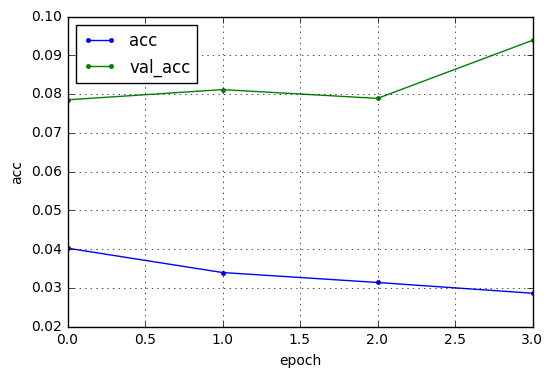

In [39]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

## Convolutional Neural Networks

In [42]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras.utils

In [6]:
batch_size = 128
num_classes = 10
epochs = 12

In [7]:
img_rows, img_cols = 28, 28

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
print(x_train.shape)

(60000, 28, 28)


In [10]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [13]:
x_train /= 255
x_test /= 255

In [41]:
x_test.shape

(10000, 28, 28, 1)

In [43]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [34]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

In [36]:
model.layers

In [38]:
model.layers[0].name

'conv2d_11'

In [39]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [45]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 334s - loss: 0.2622 - acc: 0.9215 - val_loss: 0.0754 - val_acc: 0.9757
